In [294]:
import pandas as pd
import os

In [315]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# -------------------- DEFINE CUSTOM TEMPLATE -------------------- #
pio.templates['draft'] = go.layout.Template(layout=dict(
    margin=dict(l=50, r=50, b=50, t=50),
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
)
))
pio.templates.default = "plotly_white+draft"

import torch
from models.heads.finetuning.MLP import MLP

from utils.utils import load_model
from models.model_factory import Model_factory
from models.optimizers import get_optimizer
from Dataset import dataloader
import json
from models.TS2Vec import TS2Vec
import numpy as np

from utils.task_trainer import plot_embedding_with_umap
from mine_utils import load_task_dataset
import umap

#train_loader, val_loader, test_loader = load_task_dataset(32, 'Fragment')

### Fragment Results

In [297]:
fragment_result = pd.read_csv('Results/Pos_training/Fragment_all_results.csv')
fragment_result.head()

ssl_model head_model    calibration      scenario   dataset  avg_loss  \
0     TSTCC        MLP  linearprobing    one_domain  Fragment    0.5509   
1     TSTCC        MLP  linearprobing  four_domains  Fragment    0.5043   
2     TSTCC        FCN     finetuning  four_domains  Fragment    0.2810   
3     TSTCC        FCN  linearprobing    one_domain  Fragment    0.1951   
4     TSTCC        FCN  linearprobing  four_domains  Fragment    0.1988   

      acc  acc_std      f1  f1_std  recall  recall_std  precision  \
0  0.5317   0.0063  0.4072  0.0076  0.5509      0.0080     1.1092   
1  0.4837   0.0066  0.3457  0.0084  0.5043      0.0051     1.0121   
2  0.1680   0.1165  0.1032  0.0564  0.2810      0.1058     1.8616   
3  0.1054   0.0496  0.0825  0.0337  0.1951      0.0570     1.6465   
4  0.0939   0.0192  0.1003  0.0306  0.1988      0.0192     1.6779   

   precision_std  
0         0.0158  
1         0.0300  
2         0.1345  
3         0.0328  
4         0.0777

In [337]:
fig = px.bar(fragment_result, x='ssl_model', y='f1', color='scenario', 
             facet_row='calibration', facet_col='head_model', barmode='group',
             labels={'ssl_model': 'SSL Model', 'acc': 'Accuracy', 'scenario': 'Scenario'},
             category_orders={
                 'scenario': [
                    'one_domain', 'one_domain_extended', 
                    'one_domain_continued1', 'one_domain_continued30',
                    'one_domain+Fragment',
                    'four_domains', 'four_domains_extended', 
                    'four_domains+Fragment',
                    ]
             }
             )

# fig.update_yaxes(range=[0, 1])
fig.update_layout(height=640, font_size=16, 
                  legend_title_text="",
                  margin=dict(l=40, r=40, b=30, t=80),
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=1.07, xanchor="center", x=0.5)
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': ('Scenario=one_domain<br>calibra' ... '%{x}<br>f1=%{y}<extra></extra>'),
              'legendgroup': 'one_domain',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'one_domain',
              'offsetgroup': 'one_domain',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['TSTCC', 'TS2Vec', 'Series2Vec'], dtype=object),
              'xaxis': 'x3',
              'y': {'bdata': 'yJi7lpAP2j+PU3Qkl//gPwfOGVHaG9A/', 'dtype': 'f8'},
              'yaxis': 'y3'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('Scenario=one_domain<br>calibra' ... '%{x}<br>f1=%{y}<extra></extra>'),
              'legendgroup': 'one_domain',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'one_domain',
              'offsetgroup': 'one_domain',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['TSTCC', 'TS2Vec', 'Series2Vec'], dtype=object),
              'xaxis': 'x4',
              'y': {'bdata': 'H4XrUbgetT/FILByaJG9P4V80LNZ9bk/', 'dtype': 'f8'},
              'yaxis': 'y4'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('Scenario=one_domain<br>calibra' ... '%{x}<br>f1=%{y}<extra></extra>'),
              'legendgroup': 'one_domain',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'one_domain',
              'offsetgroup': 'one_domain',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['TSTCC', 'TS2Vec', 'Series2Vec'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'ldQJaCJsqD8IPZtVn6vjP5p3nKIjubw/', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('Scenario=one_domain<br>calibra' ... '%{x}<br>f1=%{y}<extra></extra>'),
              'legendgroup': 'one_domain',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'one_domain',
              'offsetgroup': 'one_domain',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['TSTCC', 'TS2Vec', 'Series2Vec'], dtype=object),
              'xaxis': 'x2',
              'y': {'bdata': '1sVtNIC3sD90RpT2Bl+4P44G8BZIUKw/', 'dtype': 'f8'},
              'yaxis': 'y2'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('Scenario=one_domain_extended<b' ... '%{x}<br>f1=%{y}<extra></extra>'),
              'legendgroup': 'one_domain_extended',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'one_domain_extended',
              'offsetgroup': 'one_domain_extended',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Series2Vec', 'TS2Vec', 'TSTCC'], dtype=object),
              'xaxis': 'x3',
              'y': {'bdata': 'aLPqc7UV0z8mUwWjkjrhP1dbsb/sntg/', 'dtype': 'f8'},
              'yaxis': 'y3'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('Scenario=one_domain_extended<b' ... '%{x}<br>f1=%{y}<extra></extra>'),
              'legendgroup': 'one_domain_extended',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'one_domain_extended',
              'offsetgroup': 'one_domain_extended',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': arr

### IEEEPPG Results

In [299]:
ieeeppg_result = pd.read_csv('Results/Pos_training/ieeeppg_results.csv')
ieeeppg_result.head()

ssl_model head_model    calibration      scenario  dataset   avg_loss  \
0     TSTCC        MLP  linearprobing    one_domain  IEEEPPG   517.3157   
1     TSTCC        MLP  linearprobing  four_domains  IEEEPPG   518.3404   
2     TSTCC        MLP     finetuning    one_domain  IEEEPPG   535.3663   
3     TSTCC        MLP     finetuning  four_domains  IEEEPPG   604.8880   
4     TSTCC        FCN  linearprobing    one_domain  IEEEPPG  1190.1912   

      mse  mse_std  r2_score  r2_score_std     rmse  rmse_std        mae  \
0  0.0101   0.0043   22.7445        0.0498  18.3980    0.1768   529.4080   
1  0.0082   0.0030   22.7671        0.0346  18.4338    0.1247   529.0043   
2 -0.0244   0.0264   23.1364        0.2993  19.1758    0.5177   543.2826   
3 -0.1574   0.0264   24.5932        0.2804  21.0037    0.3759   591.9205   
4 -1.2774   0.2310   34.4638        1.7447  30.7696    1.6269  1177.3956   

    mae_std  
0    1.4312  
1    1.1918  
2   11.4943  
3   15.9592  
4  119.0651

In [336]:
fig = px.bar(ieeeppg_result, x='ssl_model', y='rmse', color='scenario', 
             facet_row='calibration', facet_col='head_model', barmode='group')

fig.update_layout(height=640, width=1000, font_size=16, 
                  legend_title_text="",
                  margin=dict(l=40, r=40, b=30, t=80),
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=1.07, xanchor="center", x=0.5)
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': ('scenario=one_domain<br>calibra' ... 'x}<br>rmse=%{y}<extra></extra>'),
              'legendgroup': 'one_domain',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'one_domain',
              'offsetgroup': 'one_domain',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['TSTCC', 'TS2Vec', 'Series2Vec'], dtype=object),
              'xaxis': 'x3',
              'y': {'bdata': '2c73U+NlMkCxv+yePBwyQMDsnjwstDJA', 'dtype': 'f8'},
              'yaxis': 'y3'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('scenario=one_domain<br>calibra' ... 'x}<br>rmse=%{y}<extra></extra>'),
              'legendgroup': 'one_domain',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'one_domain',
              'offsetgroup': 'one_domain',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['TSTCC', 'TS2Vec', 'Series2Vec'], dtype=object),
              'xaxis': 'x4',
              'y': {'bdata': 'aQBvgQTFPkB6xyk6kgtBQCZTBaOSUkBA', 'dtype': 'f8'},
              'yaxis': 'y4'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('scenario=one_domain<br>calibra' ... 'x}<br>rmse=%{y}<extra></extra>'),
              'legendgroup': 'one_domain',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'one_domain',
              'offsetgroup': 'one_domain',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['TSTCC', 'TS2Vec', 'Series2Vec'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'BaOSOgEtM0AUrkfheoQ3QBE2PL1SdjJA', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('scenario=one_domain<br>calibra' ... 'x}<br>rmse=%{y}<extra></extra>'),
              'legendgroup': 'one_domain',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'one_domain',
              'offsetgroup': 'one_domain',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['TSTCC', 'TS2Vec', 'Series2Vec'], dtype=object),
              'xaxis': 'x2',
              'y': {'bdata': '8fRKWYYwSEA/NV66SbxLQCv2l92Tx0JA', 'dtype': 'f8'},
              'yaxis': 'y2'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('scenario=four_domains<br>calib' ... 'x}<br>rmse=%{y}<extra></extra>'),
              'legendgroup': 'four_domains',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'four_domains',
              'offsetgroup': 'four_domains',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['TSTCC', 'TS2Vec', 'Series2Vec'], dtype=object),
              'xaxis': 'x3',
              'y': {'bdata': 'OwFNhA1vMkAeFmpN8/4xQC0hH/Rs9jJA', 'dtype': 'f8'},
              'yaxis': 'y3'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('scenario=four_domains<br>calib' ... 'x}<br>rmse=%{y}<extra></extra>'),
              'legendgroup': 'four_domains',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'four_domains',
              'offsetgroup': 'four_domains',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['TSTCC', 'TS2Vec', 'Series2Vec'], dtyp

# Overfitting Analysis

In [8]:
!ls Results/Pos_training/TSTCC_continued30/2025-05-07_12-27 | grep "pth"

MLP_finetuning_and_one_domain_best_head_model_across_all_loss_validation.pth
MLP_finetuning_and_one_domain_best_ssl_model_weights.pth
UMAP_encoder_after_MLP_finetuning_and_one_domain.pth
UMAP_encoder_before_MLP_finetuning_and_one_domain.pth
UMAP_head_after_MLP_finetuning_and_one_domain.pth


## Models

In [609]:
encoder_path_original = "Results/Pre_Training/TS2Vec/2025-05-06_16-30/checkpoints/WESAD_continued30_pretrained_TS2Vec_best.pth"
encoder_path_after_finetuning = "/home/adilson/Git/ssl/Results/Pos_training/TS2Vec_continued30/2025-05-07_10-01/MLP_finetuning_and_one_domain_best_ssl_model_weights.pth"
encoder_path_after_finetuning = "Results/Pos_training/TS2Vec_continued1/2025-05-05_10-33/MLP_finetuning_and_one_domain_best_ssl_model_weights.pth"

head_model_after_finetuning = torch.load("Results/Pos_training/TSTCC_continued30/2025-05-07_12-27/MLP_finetuning_and_one_domain_best_head_model_across_all_loss_validation.pth")

In [191]:
encoder_config = "Results/Pre_Training/TS2Vec/2025-05-06_16-30/WESAD_continued30_TS2Vec_config.json"

with open(encoder_config, 'r') as f:
    encoder_config = json.load(f)

In [340]:
encoder_config

{'Model_Type': 'TS2Vec',
 'Training_mode': 'Pre_Training',
 'save_dir': 'Results/Pre_Training/TS2Vec/2025-05-06_16-30/checkpoints',
 'data_dir': 'Dataset/Benchmarks',
 'seed': 1234,
 'gpu': 0,
 'batch_size': 64,
 'optim_args': {'lr': 0.001, 'betas': [0.9, 0.999]},
 'model_args': {'in_dim': 1,
  'out_dim': 320,
  'hidden_dim': 64,
  'depth': 10,
  'kernel_size': 3,
  'dropout': 0.1,
  'mask_mode': 'binomial'},
 'epochs': 30,
 'problem': 'WESAD_ECGonly',
 'resume': True,
 'old-problem': 'WESAD_ECGonly',
 'old-config': 'Results/Pre_Training/TS2Vec/2025-04-15_16-04/WESAD_ECGonly_TS2Vec_config.json'}

In [610]:
SS_Encoder = TS2Vec(**encoder_config['model_args'])
SS_Encoder.load_state_dict(torch.load(encoder_path_after_finetuning))
SS_Encoder.to('cuda')

## Data

## Fragment

In [611]:
train_data = torch.load('Dataset/Fragment/ecg-fragment_360hz/train.pt')
test_data = torch.load('Dataset/Fragment/ecg-fragment_360hz/test.pt')
val_data = torch.load('Dataset/Fragment/ecg-fragment_360hz/val.pt')
train_loader = torch.utils.data.DataLoader(train_data['samples'], batch_size=32, shuffle=True)

In [607]:
encoder_config['problem'] = encoder_config['old-problem']

## WESAD

In [287]:
Data = dataloader.data_loader(encoder_config)
Data['train_data'].shape

2025-05-12 12:26:06,707 | INFO : Loading preprocessed WESAD_ECGonly
2025-05-12 12:26:06,928 | INFO : 104877 samples will be used for training
2025-05-12 12:26:06,928 | INFO : Train Data Shape: 104877 samples, 1 channels, 720 time steps
2025-05-12 12:26:06,928 | INFO : 7517 samples will be used for testing


(104877, 1, 720)

In [612]:
#Data['train_data'] = np.swapaxes(Data['train_data'], 1, 2)
#Data['test_data'] = np.swapaxes(Data['test_data'], 1, 2)

train_samples, train_labels = Data['train_data'], [0 for i in range(len(Data['train_data']))]
test_samples, test_labels = Data['test_data'], [0 for i in range(len(Data['test_data']))]

train_samples = torch.tensor(train_samples, dtype=torch.float32).to('cuda')
test_samples = torch.tensor(test_samples, dtype=torch.float32).to('cuda')
train_labels = torch.tensor(train_labels, dtype=torch.float32).to('cuda')
test_labels = torch.tensor(test_labels, dtype=torch.float32).to('cuda')
n_train = len(train_samples)
n_test = len(test_samples)

train_split = ['train' for i in range(n_train)]
test_split  = ['test' for i in range(n_test)]

all_data_wesad = torch.cat((train_samples, test_samples), dim=0)

all_labels_wesad = torch.cat((train_labels, test_labels))
all_data_wesad = torch.tensor(all_data_wesad, dtype=torch.float32).to('cuda')
all_labels_wesad = torch.tensor(all_labels_wesad, dtype=torch.float32).to('cuda')

# create dataloader 
wesad_dataset = torch.utils.data.TensorDataset(all_data_wesad, all_labels_wesad)
#wesad_loader = torch.utils.data.DataLoader(wesad_dataset, batch_size=32, shuffle=True)

/tmp/ipykernel_2451697/3697076528.py:20: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_2451697/3697076528.py:21: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [613]:
train_samples, train_labels = train_data['samples'], train_data['labels']
test_samples, test_labels = test_data['samples'], test_data['labels']
val_samples, val_labels  = val_data['samples'], val_data['labels']

n_train = len(train_samples)
n_test = len(test_samples)
n_val = len(val_samples)

train_split = [0 for i in range(n_train)]
val_split   = [1 for i in range(n_val)]
test_split  = [2 for i in range(n_test)]

#train_split = ['fragment' for i in range(n_train)]
#val_split   = ['fragment' for i in range(n_val)]
#test_split  = ['fragment' for i in range(n_test)]

all_data = torch.cat((train_samples, val_samples, test_samples), dim=0)
all_split = train_split + val_split + test_split
all_labels = torch.cat((train_labels, val_labels, test_labels))

all_data = torch.tensor(all_data, dtype=torch.float32).to('cuda')
all_labels = torch.tensor(all_split, dtype=torch.float32).to('cuda')
fragment_dataset = torch.utils.data.TensorDataset(all_data, all_labels)
fragment_loader = torch.utils.data.DataLoader(fragment_dataset, batch_size=32, shuffle=True)

/tmp/ipykernel_2451697/2850266425.py:21: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [614]:
len(all_split)

fig, embed, labels = plot_embedding_with_umap(SS_Encoder, fragment_loader, 'cuda', '', 'encoder_original', 'umap', head_model=None)# original
px.scatter(x=embed[:, 0], 
           y=embed[:, 1], 
            color=labels,
            ) 

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<br>color=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AACAPwAAAAAAAAAAAAAAAAAAAAAAAA' ... 'AAAACAPwAAAAAAAABAAAAAAAAAAAA='),
                                   'dtype': 'f4'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('/Ez5va19q74/bl9BCMy4PgziQb7naw' ... 'e/2YMiQfZjj790iAbATMvUvpOSB8A='),
                    'dtype': 'f4'},
              'xaxis': 'x',
              'y': {'bdata': ('iThLQQSlSUHwEC9BhL+6QOn9o0BFSs' ... 'e/TO8GQRohK8AxGQ3AQjeiQPcVXr8='),
                    'dtype': 'f4'},
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [ ]:

train_split = [0 for i in range(n_train)]
val_split   = [1 for i in range(n_val)]
test_split  = [2 for i in range(n_test)]

In [278]:
wesad_and_fragment = torch.utils.data.ConcatDataset([wesad_dataset, fragment_dataset])
wesad_and_fragment_loader = torch.utils.data.DataLoader(wesad_and_fragment, batch_size=64, shuffle=False)

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<br>color=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AAAAQAAAAAAAAIA/AAAAAAAAAAAAAE' ... 'AAAACAQAAAAAAAAIA/AACgQAAAgD8='),
                                   'dtype': 'f4'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('gVzIQIVwE0Fs38RAYxIIQahpGEHZN/' ... '1AGkBaQcEZBUEJmstAl/PkQBsrzUA='),
                    'dtype': 'f4'},
              'xaxis': 'x',
              'y': {'bdata': ('5tbLPsguJUBhMAdBC3UhQJrT2T9Rqy' ... 'w/fRMlQbjsVkDPOkBAC3eEQR2k6T8='),
                    'dtype': 'f4'},
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [292]:
# original
px.scatter(x=embed[:, 0], 
           y=embed[:, 1], 
            color=labels,
            ) 

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<br>color=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'BAAACgQAAAoEAAAKBAAACgQAAAoEA='),
                                   'dtype': 'f4'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': {'bdata': ('PZMQQTelEkHNxg1BL8cMQVshEEFp7x' ... 'RBtjkEQSL8CEGCugVBC/cEQRlEBUE='),
                    'dtype': 'f4'},
              'xaxis': 'x',
              'y': {'bdata': ('rtt9PVczIT53xYs+JewxPmBT3T7UTs' ... 'W95DfuvbjRwj4eZDW+1Qf4OghetL4='),
                    'dtype': 'f4'},
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [281]:
px.scatter(x=embed[:, 0], 
           y=embed[:, 1], 
            color=labels,
            ) 

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<br>color=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'BAAACgQAAAoEAAAKBAAACgQAAAoEA='),
                                   'dtype': 'f4'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': {'bdata': ('keUDwAIeHcAXcB3AMg4WwPe0AsAQ7c' ... 'k/4eodQXaBDEEGS4A+JrJLP3FkG0E='),
                    'dtype': 'f4'},
              'xaxis': 'x',
              'y': {'bdata': ('e8PgPhyR+j5HMAg/hm7/PqWY2D45sf' ... '9B29XMvvCrED/5KvW9QosWQb5RmT0='),
                    'dtype': 'f4'},
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


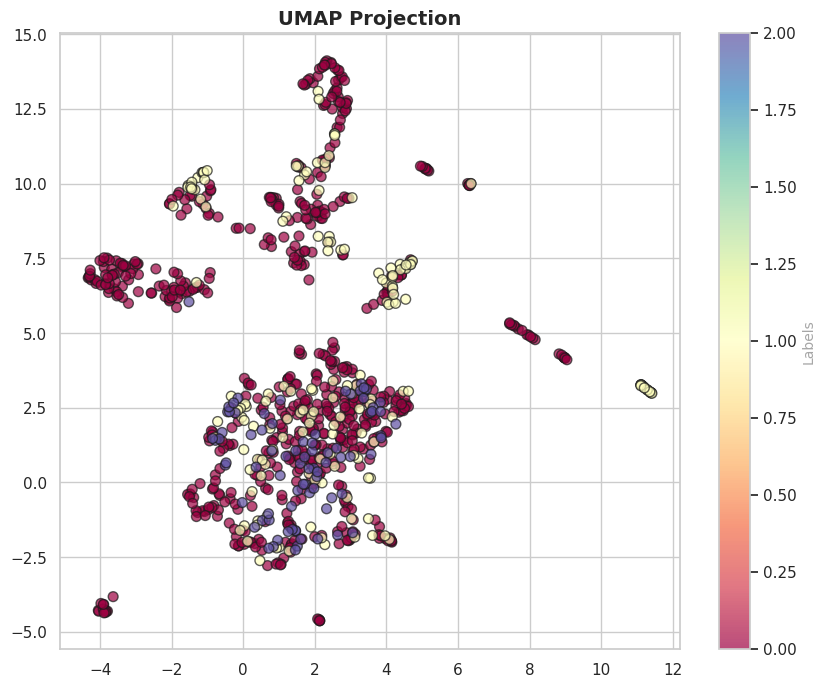

In [32]:
plot_embedding_with_umap(SS_Encoder, all_data_loader, 'cuda', '', 'encoder_original', 'umap', head_model=None)

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


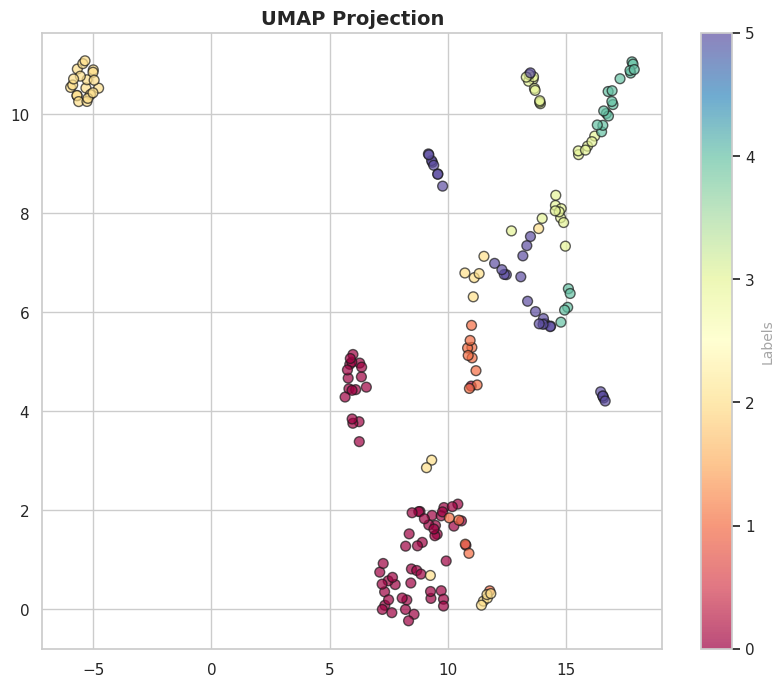

In [253]:
plot_embedding_with_umap(SS_Encoder, val_loader, 'cuda', '', 'encoder_original', 'umap', head_model=None)

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


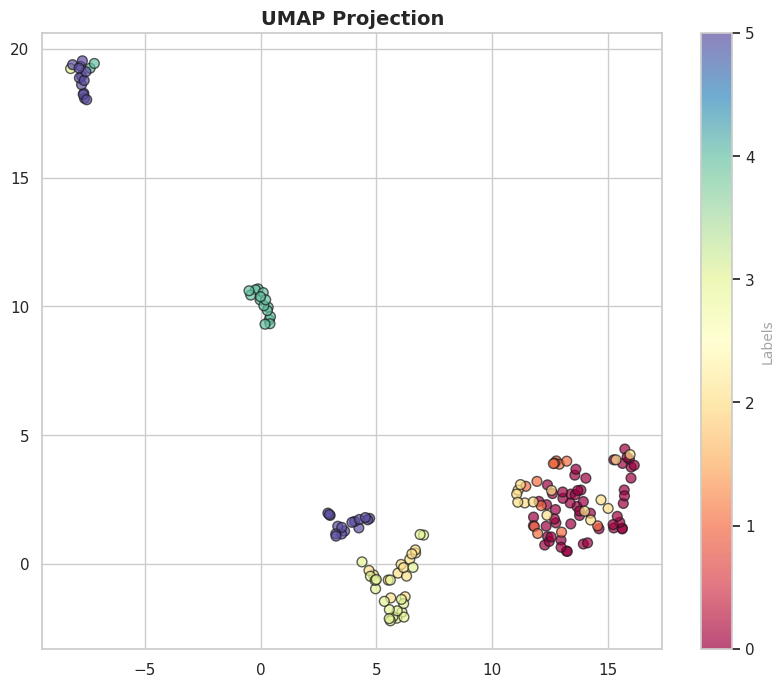

In [254]:
plot_embedding_with_umap(SS_Encoder, test_loader, 'cuda', '', 'encoder_original', 'umap', head_model=None)

In [ ]:
train_emb = torch.cat([torch.tensor(e) for e in train_data['samples']], dim=0)
train_emb.shape

test_emb = torch.cat([torch.tensor(e) for e in test_data['samples']], dim=0)

/tmp/ipykernel_1725956/148252254.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_emb = torch.cat([torch.tensor(e) for e in train_data['samples']], dim=0)
/tmp/ipykernel_1725956/148252254.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_emb = torch.cat([torch.tensor(e) for e in test_data['samples']], dim=0)


In [274]:
mapper_trai = umap.UMAP(n_neighbors=5, 
                       min_dist=0.2,    
                       metric='euclidean', 
                       random_state=42,
                       transform_seed=42).fit(train_emb)

mapper_test = umap.UMAP(n_neighbors=5, 
                       min_dist=0.2,    
                       metric='euclidean', 
                       random_state=42,
                       transform_seed=42).fit(test_emb)

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [690]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.cm import get_cmap

def plot_umap_comparison(embedding_before, embedding_after, train_labels, supertitle, save_path="umap_comparison.pdf"):
    sns.set(style="whitegrid")
    labels = train_labels.numpy()
    unique_labels = np.unique(labels)
    num_classes = len(unique_labels)
    cmap = get_cmap('Spectral')
    colors = [cmap(i / (num_classes - 1)) for i in range(num_classes)]

    fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
    fig.suptitle(supertitle, fontsize=24, fontweight="bold", y=1)

    for ax, embedding, title_suffix in zip(
        axes, 
        [embedding_before, embedding_after], 
        ['Before fine-tuning', 'After fine-tuning']
    ):
        for i, label in enumerate(unique_labels):
            indices = labels == label
            ax.scatter(
                embedding[indices, 0],
                embedding[indices, 1],
                color=colors[i],
                label=str(label),
                edgecolor='k',
                alpha=0.8,
                s=70,
                marker='o'
            )
        ax.set_title(f"{title_suffix}", fontsize=20, fontweight="bold", pad=20)  # add vertical padding


    fig.text(0.5, 0.09, 'Dimension 2', ha='center', fontsize=18)
    fig.text(0, 0.5, 'Dimension 1', va='center', rotation='vertical', fontsize=18)
    class_names = [
        "Dangerous",
        "Early threatening",
        "Ventricular",
        "Dangerous ventricular",
        "Supraventricular",
        "Normal rhythm"
    ]
    fig.legend(
        labels=class_names,
        title="Classes",
        loc="lower center",
        ncol=num_classes,
        frameon=False,
        fontsize=22,
        title_fontsize=22,
        handletextpad=0.05,
        columnspacing=0.6,
        labelspacing=0.5,
        bbox_to_anchor=(0.5, -0.08)
    )
    
    plt.tight_layout(rect=[0, 0.1, 1, 1])  # make space for bottom legend
    plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.close(fig)

    return fig
import matplotlib.pyplot as plt

def plot_losses_side_by_side(train_loss_lp, val_loss_lp, train_loss_ft, val_loss_ft, name, save_path="losses_side_by_side.pdf"):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Plot Linear Probing
    axs[0].plot(train_loss_lp, label='Train Loss', color='blue')
    axs[0].plot(val_loss_lp, label='Validation Loss', color='orange')
    axs[0].set_title('Linear probing', fontsize=16, fontweight="bold", pad=15)  # aumento da distância do título
    axs[0].set_xlabel('Epochs', fontsize=14)
    axs[0].set_ylabel('Loss', fontsize=14)
    axs[0].legend()

    # Plot Fine-tuning
    axs[1].plot(train_loss_ft, label='Train Loss', color='blue')
    axs[1].plot(val_loss_ft, label='Validation Loss', color='orange')
    axs[1].set_title('Fine-tuning', fontsize=16, fontweight="bold", pad=15)  # aumento da distância do título
    axs[1].set_xlabel('Epochs', fontsize=14)
    axs[1].legend()

    # Layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.close(fig)
    return fig



# UMAP Exploration

In [616]:
import torch

## TS2VEC

In [617]:
ts2vec_continued1_before = torch.load('Results/Pos_training/TS2Vec_continued1/2025-05-05_10-33/UMAP_encoder_before_MLP_finetuning_and_one_domain.pth')
ts2vec_continued1_after = torch.load('Results/Pos_training/TS2Vec_continued1/2025-05-05_10-33/UMAP_encoder_after_MLP_finetuning_and_one_domain.pth')

In [618]:
mapper_ts2vec_continued1_before = umap.UMAP(n_neighbors=5, 
                       min_dist=0.2,    
                       metric='euclidean', 
                       random_state=42,
                       transform_seed=42).fit(ts2vec_continued1_before)

mapper_ts2vec_continued1_after = umap.UMAP(n_neighbors=5, 
                       min_dist=0.2,    
                       metric='euclidean', 
                       random_state=42,
                       transform_seed=42).fit(ts2vec_continued1_after)

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



/tmp/ipykernel_2451697/864449222.py:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



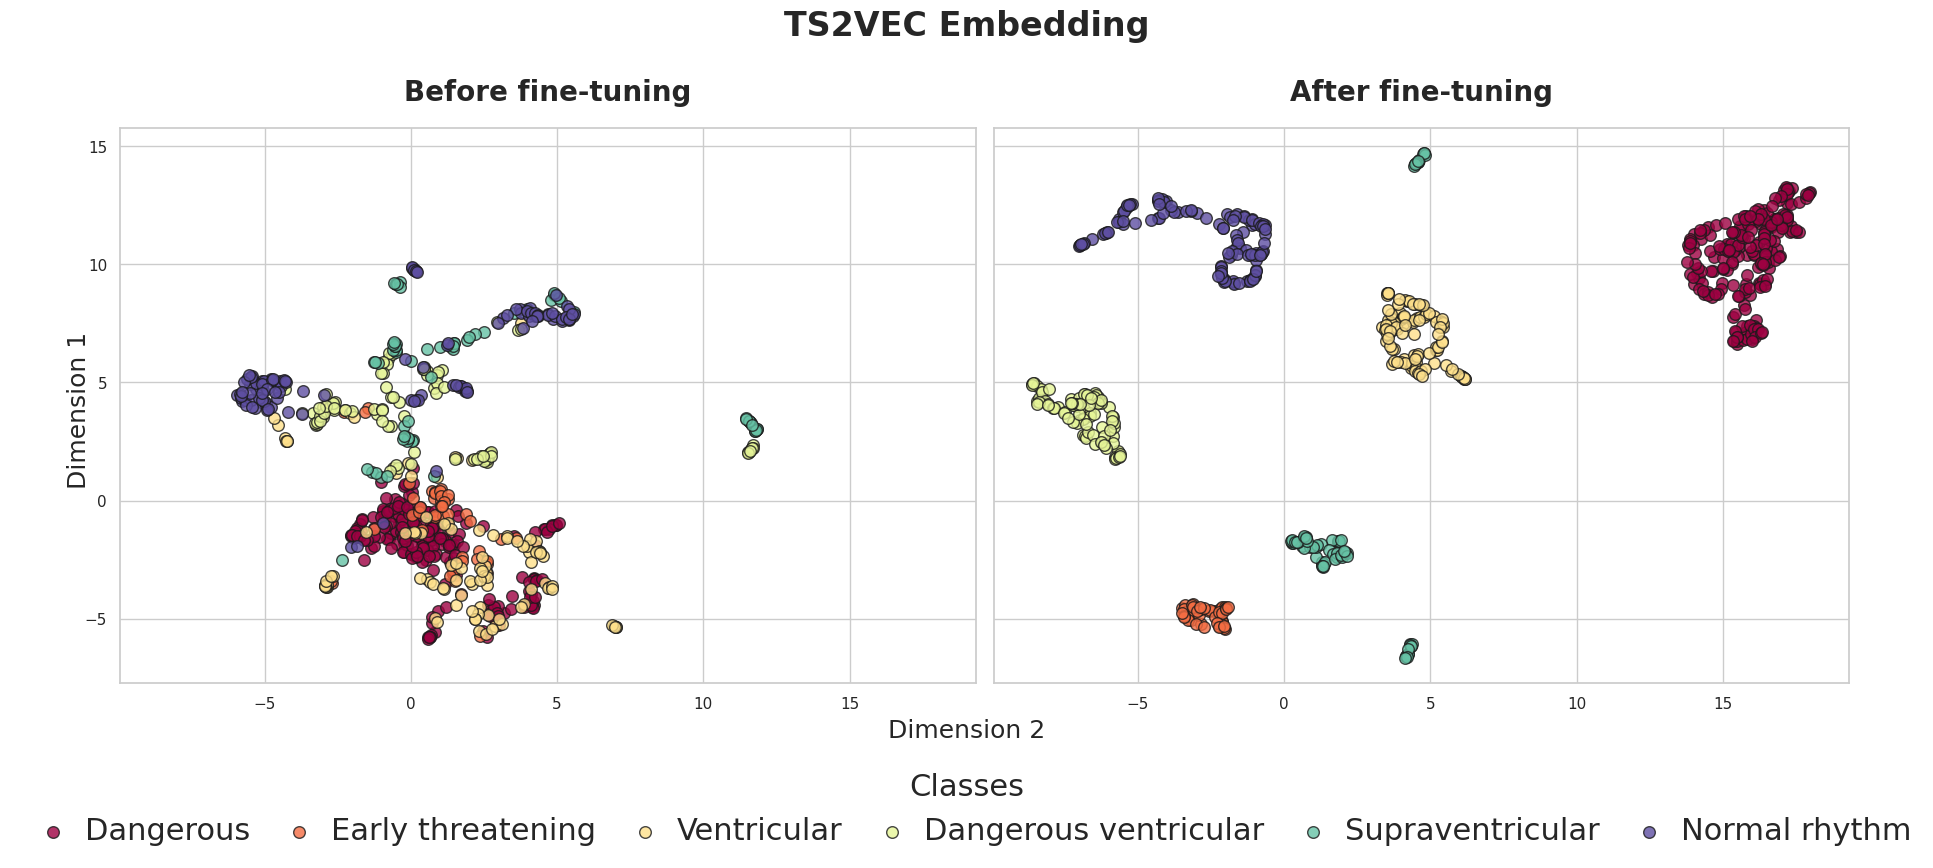

In [619]:
plot_umap_comparison(mapper_ts2vec_continued1_before.embedding_, mapper_ts2vec_continued1_after.embedding_, train_data['labels'][:-11], 'TS2VEC Embedding', save_path='TS2VEC_umap_train_comparison.pdf')

## TSTCC

In [620]:
tstcc_continued1_before = torch.load('Results/Pos_training/TSTCC_continued1/2025-05-05_10-49/UMAP_encoder_before_MLP_finetuning_and_one_domain.pth')
tstcc_continued1_after = torch.load('Results/Pos_training/TSTCC_continued1/2025-05-05_10-49/UMAP_encoder_after_MLP_finetuning_and_one_domain.pth')

In [621]:
mapper_tstcc_continued1_before = umap.UMAP(n_neighbors=5, 
                       min_dist=0.2,    
                       metric='euclidean', 
                       random_state=42,
                       transform_seed=42).fit(tstcc_continued1_before)

mapper_tstcc_continued1_after = umap.UMAP(n_neighbors=5, 
                       min_dist=0.2,    
                       metric='euclidean', 
                       random_state=42,
                       transform_seed=42).fit(tstcc_continued1_after)

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/adilson/miniconda3/envs/ssl/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



/tmp/ipykernel_2451697/864449222.py:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



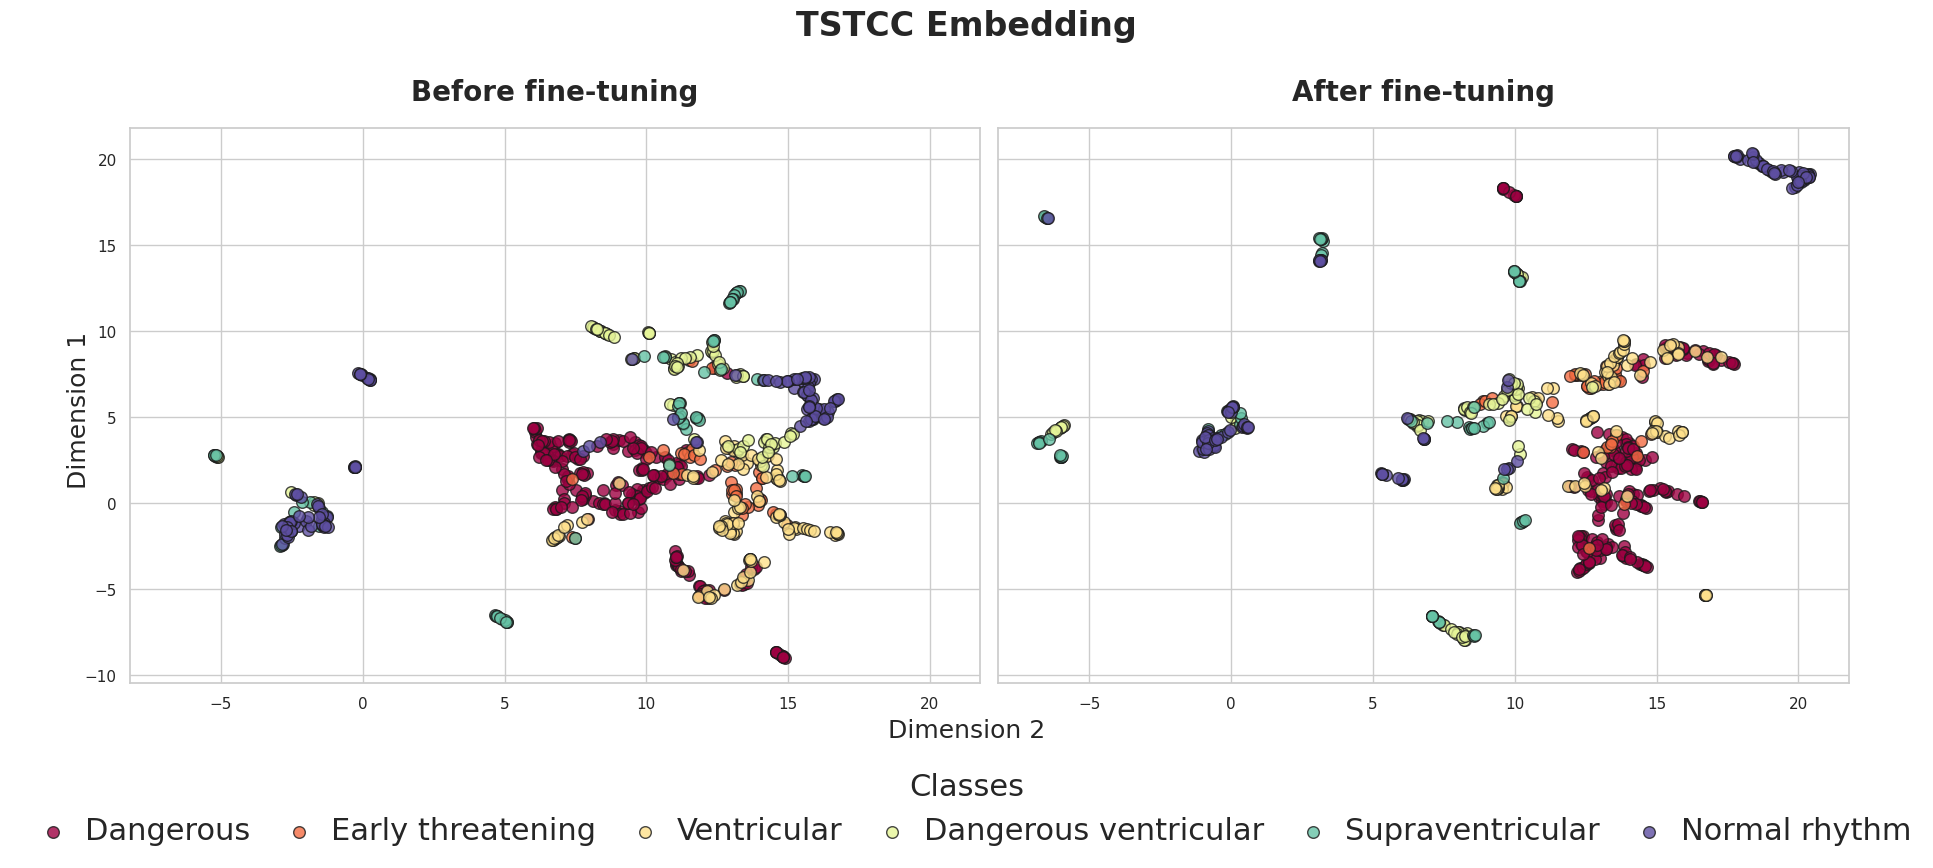

In [622]:
plot_umap_comparison(mapper_tstcc_continued1_before.embedding_, mapper_tstcc_continued1_after.embedding_, train_data['labels'][:-11], 'TSTCC Embedding', save_path='TSTCC_umap_train_comparison.pdf')

# Overfitting Anaylsis

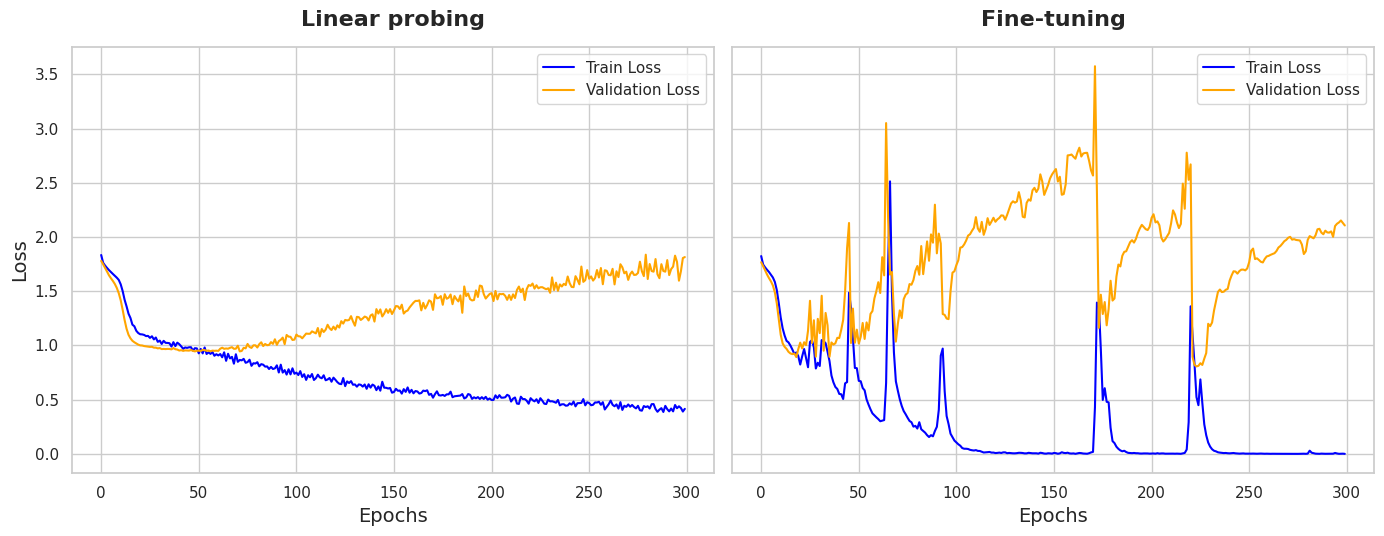

In [691]:
loss_lp_path = 'Results/Pos_training/Overfitting/TS2Vec_continued30/linearprobing/300epochs/2025-05-11_19-36/train_val_loss_300_eps_run_0.json'
with open(loss_lp_path, 'r') as f:
    loss_lp = json.load(f)

loss_fp_path = '/home/adilson/Git/ssl/Results/Pos_training/Overfitting/TS2Vec_continued30/finetuning/300epochs/2025-05-11_17-16/train_val_loss_300_eps_run_0.json'
with open(loss_fp_path, 'r') as f:
    loss_ft = json.load(f)
train_val_ft_loss = loss_ft['train_loss']
val_val_ft_loss = loss_ft['val_loss']

train_loss_lp = loss_lp['train_loss']
val_loss_lp = loss_lp['val_loss']


plot_losses_side_by_side(train_loss_lp, val_loss_lp, train_val_ft_loss, val_val_ft_loss, 'TS2Vec', save_path='TS2Vec_losses_comparisons.pdf')
